# Version Checking

In [1]:
import sys 
import numpy as np
print("Python Version:", sys.version, '\n')
print("Numpy Version: ", np.__version__)

Python Version: 3.7.3 | packaged by conda-forge | (default, Jul  1 2019, 22:01:29) [MSC v.1900 64 bit (AMD64)] 

Numpy Version:  1.16.1


# Why do we like numpy?

Numpy is a great library with many, many functions that extend it well beyond normal Python. We're going to focus on some of the primary functions that we use all the time. 

Also note that Pandas is pretty much just numpy with column names (and some SQL seasoning) in a lot of ways, so anything we can do to a numpy array we can usually do with a Pandas column. A prominent exception: matrix math doesn't work well in pandas.

### Get some data (we'll just use some random data)

In [2]:
import numpy as np

In [3]:
np.random?

In [4]:
data = np.random.uniform(size=10000) # ndarray object
data_as_list = data.tolist() # converting ndarray into a list to prove a point later

In [6]:
print(type(data))
print(type(data_as_list))

<class 'numpy.ndarray'>
<class 'list'>


In [7]:
data.shape

(10000,)

### Broadcasting

If we want to perform a mathematical operation on a list, we have to explicitly loop through the list. If we want to act on an array, we can just treat it like a single object and the operation is "broadcast" to all of the members of the array. **It's LIGHTNING fast**. Let's see it in action.

In [8]:
new_data = data + 2

In [13]:
# Zip is a really useful function
# Imagine on each side of the list, you have two lists runnung beside each other
# added, raw in the `for` loop below unzips the list

for added, raw in zip(new_data[:5],data):
    print("aded:{}, raw:{}".format(added, raw))

aded:2.529040468307611, raw:0.5290404683076112
aded:2.4345553658097723, raw:0.43455536580977205
aded:2.9948160802839707, raw:0.9948160802839705
aded:2.0155195272523336, raw:0.01551952725233352
aded:2.1252780332885735, raw:0.12527803328857323


What do I mean when I say "lightning fast"?

In [10]:
%%timeit
new_list = [x+2 for x in data_as_list]


747 µs ± 72.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
%%timeit
new_data2 = data + 2

5.77 µs ± 93.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


We can see from the above examples that broadcasting makes it SUPER FAST, as compared to using a for loop (using a base-python list)

### Filtering

One of the great things about Pandas is the ability to quickly filter your data. Turns out that's because we're working with numpy arrays. Let's check out filtering on arrays - note that we're going to make a condition and each value in the array will be `True` or `False` based on whether it actually passes the condition.

In [18]:
new_data > 2.5 
# mask = conditional selection
# returns a list of boolean values where the values fulfill or do not fulfill the condition/mask

array([ True, False,  True, ..., False,  True,  True])

In [19]:
data.shape

(10000,)

In [21]:
new_data[new_data > 2.5].shape

(4922,)

Once we have the filter, if we ask the array to adjust itself based on that filter, it will automatically only keep the rows that are True.

In [22]:
np.sum(new_data > 2.5)

4922

In [24]:
new_data[new_data > 2.5].shape

(4922,)

In [25]:
new_data[new_data > 2.5]

array([2.52904047, 2.99481608, 2.76679837, ..., 2.91772286, 2.64977849,
       2.98701798])

We can also filter on any data source that has the same length as the data we're filtering. So for instance, if we make a condition on `data` which is equivalent to `new_data - 2`, we can still filter `new_data` the same way. That's possible because data has the same length.

In [26]:
new_data[data > 0.5]

array([2.52904047, 2.99481608, 2.76679837, ..., 2.91772286, 2.64977849,
       2.98701798])

#### Exercise:

Write a function that takes in two arrays and a value. The first array is a data array, the second is a 1D array, and the value should be numeric.

We want to use broadcasting and filtering to return the rows of the first array, that correspond to indexes where the second array has a value larger than the user provided value.  

We also want to add 2 to the values in that row.

Example:

```
x1 = np.array([[1,2],[3,4],[5,6]])
x2 = np.array([1, 2, 3])
value = 1.5

my_function(x1, x2, value)
----
> array([[5, 6],
>        [7, 8]])
```

In [ ]:
x1 = np.array([[1,2],[3,4],[5,6]])
x2 = np.array([1, 2, 3])
value = 1.5

In [47]:
# complete exercise here

def array_commonalities(x1, x2, value):
    """
    ---
    param (x1): takes in a 1d np array
    param (x2): takes in a 1d np array
    param (value): takes in an integer
    """
    return (x1[x2 > value] + 2)


array_commonalities(x1,x2,value)

array([[5, 6],
       [7, 8]])

### Reorganization



`numpy` also allows us to quick reorganize our array. Let's see a simple working example. By providing a list of "how to align the indexes" we can rearrange the data. 

In [50]:
# Very quick way of re-organizing you data using indexes

a = np.array([10,20,30,40,50])
a[[1,0,2,3,4]]

array([20, 10, 30, 40, 50])

### Random number draws

`numpy` also has a great series of tools for generating random numbers effectively. Let's see a few in action (we'll use matplotlib to visualize.

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")

def plot_hist(x, bins=None):
    plt.figure(dpi=100)
    plt.hist(x, bins=bins);

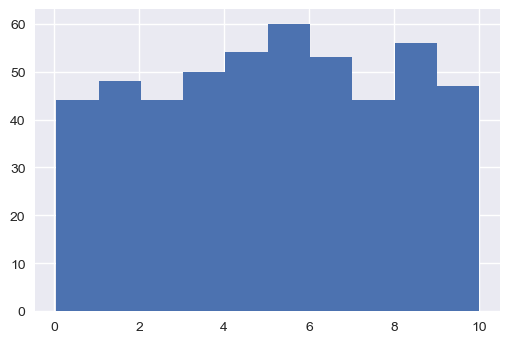

In [55]:
x = np.random.uniform(0,10,size=500)
plot_hist(x)

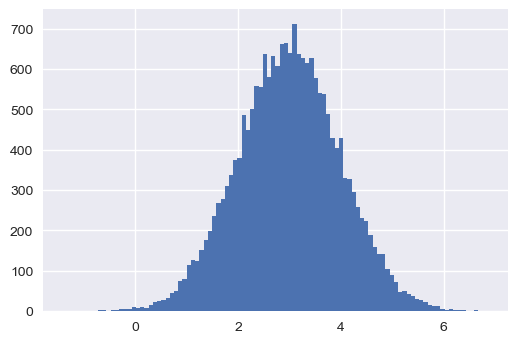

In [57]:
x = np.random.normal(3,1,size=20000)  # creates an np array with values that allow you to plot a normal distribution
plot_hist(x, bins=100)

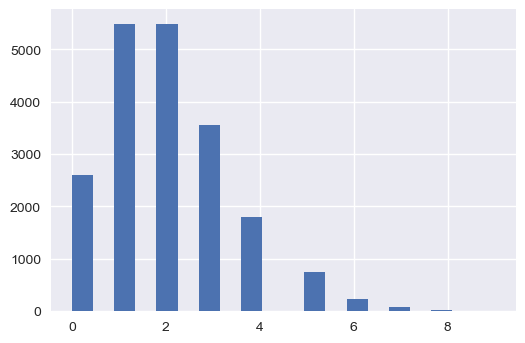

In [59]:
x = np.random.poisson(2, size=20000)  # poisson used for chance of event happening. model rare events/events happening
plot_hist(x, bins=20)

### Matrix Multiplication

Doing matrix multiplication programmatically is usually a hassel. `numpy` makes that simple. There are two methods for doing that: `numpy` treats `@` as meaning "do the matrix multiplication".

In [60]:
mat_a = np.random.uniform(size=(2,4))
mat_b = np.random.uniform(size=(4,3))

mat_a

array([[0.80065193, 0.86837514, 0.99779956, 0.56537243],
       [0.68834082, 0.97121014, 0.79557947, 0.18767269]])

In [62]:
mat_a@mat_b  #  (2 x 4) * (4 x 3)  matrix

array([[1.49950605, 2.20342101, 1.8112459 ],
       [1.4003516 , 1.93465216, 1.50468011]])

It also throws an error if the multiplication can't happen.

Try `mat_b@mat_a`

In [64]:
mat_b@mat_a

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

You can also use `np.dot` to do the multiplication. However, be careful with this, as it also computes the actual dot product of vectors. It tries to be smart about how it does that, so it usually does a good job. 

In [65]:
np.dot(mat_a, mat_b)

array([[1.49950605, 2.20342101, 1.8112459 ],
       [1.4003516 , 1.93465216, 1.50468011]])

Vector dot product example:

In [66]:
a = np.array([1,2,3])
b = np.array([4,5,6])
np.dot(a,b)

32

`numpy` also knows about basic matrix stuff like transposes, etc. It also has a ton of cool linear algebra stuff under `np.linalg` but we're going to skip over that for now.

In [67]:
mat_a

array([[0.80065193, 0.86837514, 0.99779956, 0.56537243],
       [0.68834082, 0.97121014, 0.79557947, 0.18767269]])

In [69]:
# Imagine the face of you palm is facing you.
# Transposing is just flipping your palm and now the back of your palm is facing you

mat_a.T

array([[0.80065193, 0.68834082],
       [0.86837514, 0.97121014],
       [0.99779956, 0.79557947],
       [0.56537243, 0.18767269]])

### Vectorization

And here's why `numpy` is a magical beast. We can take many common things and convert them into a "vectorized" process - meaning that we do the same thing over the whole dataset using advanced broadcasting. So for instance, let's look at adding a vector to a matrix (we're going to add this vector to each row) 

In [71]:
mat_a.T

array([[0.80065193, 0.68834082],
       [0.86837514, 0.97121014],
       [0.99779956, 0.79557947],
       [0.56537243, 0.18767269]])

In [73]:
mat_a.T + np.array([1,2])  # first column added 1, second column added 2
# as long as your columns match

array([[1.80065193, 2.68834082],
       [1.86837514, 2.97121014],
       [1.99779956, 2.79557947],
       [1.56537243, 2.18767269]])

`numpy` noticed that the column lengths matched and automatically adjusted to adding the whole vectors.

What do we think the below code will do?

In [75]:
mat_a

array([[0.80065193, 0.86837514, 0.99779956, 0.56537243],
       [0.68834082, 0.97121014, 0.79557947, 0.18767269]])

In [76]:
mat_a - np.array([1,2,3,4])  # 2x4 matrix - 2x4 matrix

array([[-0.19934807, -1.13162486, -2.00220044, -3.43462757],
       [-0.31165918, -1.02878986, -2.20442053, -3.81232731]])

We can use that to do things like calculating the distance between a single vector and a whole table of vectors. Let's see that in action.

**Let's find the vector distance between a bunch of vectors and one vector**

In [77]:
new_vec = np.array([1,2])
all_vecs = np.random.uniform(size=(100,2))

In [78]:
new_vec

array([1, 2])

In [81]:
all_vecs[0:3]

array([[0.59416831, 0.90968695],
       [0.42818023, 0.50831163],
       [0.84109511, 0.60961591]])

If we were doing it for one vector:

In [82]:
x = all_vecs[0]
np.sqrt((new_vec[0] - x[0])**2 + (new_vec[1] - x[1])**2)  # this is an L2-norm

1.1633924100103992

Now let's do it for all 100 vectors:

In [83]:
np.sqrt(np.sum((all_vecs - new_vec)**2, axis=1))[:10]

array([1.16339241, 1.59753311, 1.39943513, 1.89832718, 1.48623976,
       1.46259267, 1.87842603, 1.53710301, 1.5828222 , 1.06358245])

Many, many, many processes can be vectorized... and it can be a huge time saver on large datasets. Let's see the difference.

In [84]:
%%timeit
output = []
for x in all_vecs:
    dist = np.sqrt((new_vec[0] - x[0])**2 + (new_vec[1] - x[1])**2)
    output.append(dist)

755 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [85]:
%%timeit
np.sqrt(np.sum((all_vecs - new_vec)**2, axis=1))

11.2 µs ± 168 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


What about at a larger scale than 100?

In [86]:
all_vecs = np.random.uniform(size=(10000,2))

In [87]:
%%timeit
output = []
for x in all_vecs:
    dist = np.sqrt((new_vec[0] - x[0])**2 + (new_vec[1] - x[1])**2)
    output.append(dist)

75.1 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [88]:
%%timeit
np.sqrt(np.sum((all_vecs - new_vec)**2, axis=1))

274 µs ± 14.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [89]:
import time
list_timing = []
for num_vecs in np.linspace(10,10000,100):
    all_vecs = np.random.uniform(size=(int(num_vecs),2)).tolist()
    # To measure when we start our process
    start = time.time()
    
    # The actual process
    output = []
    for x in all_vecs:
        dist = np.sqrt((new_vec[0] - x[0])**2 + (new_vec[1] - x[1])**2)
        output.append(dist)
        
    # Figure out when the process was done and 
    # keep track of how long it took
    end = time.time()
    list_timing.append((num_vecs, end - start))

In [90]:
array_timing = []
for num_vecs in np.linspace(10,10000,100):
    all_vecs = np.random.uniform(size=(int(num_vecs),2))
    # To measure when we start our process
    start = time.time()
    
    # The actual process
    output = np.sqrt(np.sum((all_vecs - new_vec)**2, axis=1))
        
    # Figure out when the process was done and 
    # keep track of how long it took
    end = time.time()
    array_timing.append((num_vecs, end - start))

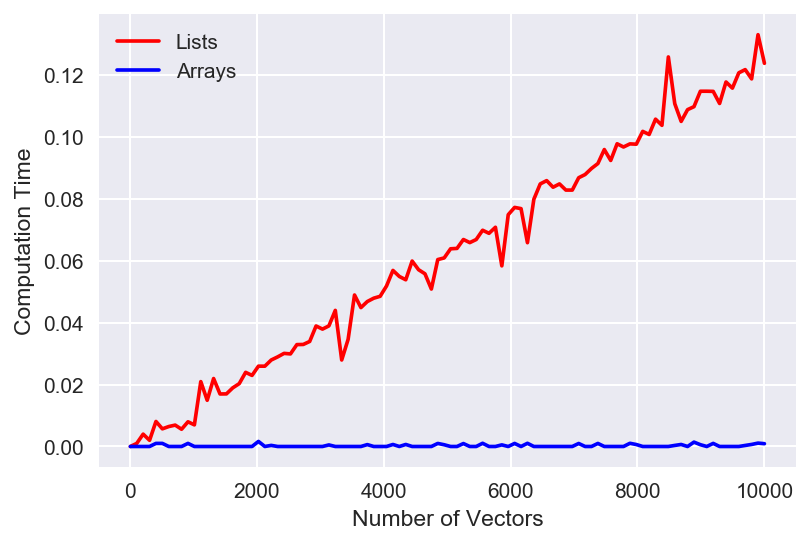

In [91]:
plt.figure(dpi=150)
list_X, list_times = zip(*list_timing)
array_X, array_times = zip(*array_timing)

plt.plot(list_X, list_times, 'r', label="Lists")
plt.plot(array_X, array_times,'b', label='Arrays')
plt.xlabel("Number of Vectors")
plt.ylabel("Computation Time")
plt.legend();

Hard to see what's happening there besides numpy kicking ass. Let's look on a log scale.

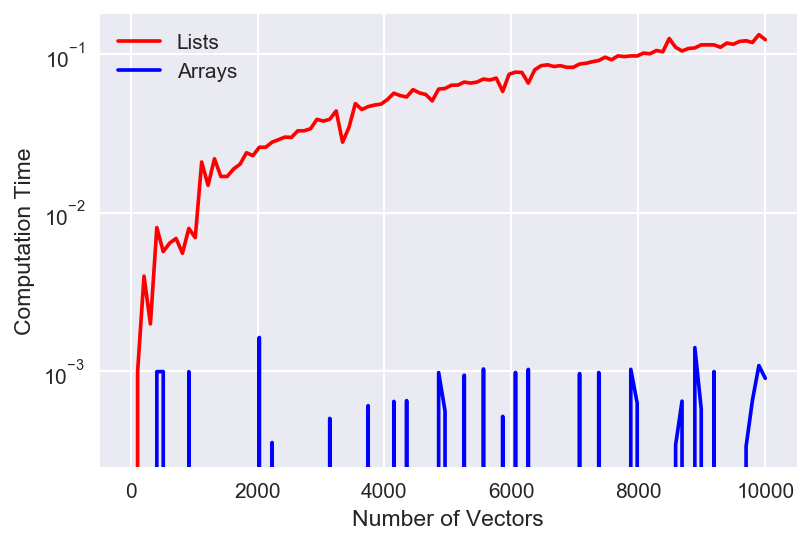

In [92]:
plt.figure(dpi=150)
list_X, list_times = zip(*list_timing)
array_X, array_times = zip(*array_timing)

plt.plot(list_X, list_times, 'r', label="Lists")
plt.plot(array_X, array_times,'b', label='Arrays')
plt.yscale('log')
plt.xlabel("Number of Vectors")
plt.ylabel("Computation Time")
plt.legend();